# Practicel ML - KNN

### Full Name : Mohammad Mohammadi
### Student Number : 402208592

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [2]:
df = pd.read_csv('train.csv')
print(df.head())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          3  Life Sciences              1            1883   
1                 1          4  Life Sciences              1            1585   
2                 3          3          Other              1            1478   
3                 9          3      Marketing              1            1965   
4                10          3      Marketing              1             722   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                        

Calculate the number of samples

In [3]:
num_samples = df.shape[0]
print(f'The number of samples in the dataset: {num_samples}')

The number of samples in the dataset: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [4]:
unique_values = df.nunique()
print(unique_values)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [5]:
columns_to_remove = unique_values[unique_values < 2].index
df = df.drop(columns=columns_to_remove)

print(f'Removed columns: {columns_to_remove}')

Removed columns: Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [8]:
business_travel_dummies = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
df = pd.concat([df, business_travel_dummies], axis=1)

print(df.head())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 7          3  Life Sciences            1883   
1                 1          4  Life Sciences            1585   
2                 3          3          Other            1478   
3                 9          3      Marketing            1965   
4                10          3      Marketing             722   

   EnvironmentSatisfaction  ... TrainingTimesLastYear  WorkLifeBalance  \
0                        4  ...                     2                3   
1                        2  ...         

In [9]:
business_travel_map = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
df['BusinessTravel_Mapped'] = df['BusinessTravel'].map(business_travel_map)

print(df[['BusinessTravel', 'BusinessTravel_Mapped']].head())

  BusinessTravel  BusinessTravel_Mapped
0  Travel_Rarely                      1
1  Travel_Rarely                      1
2  Travel_Rarely                      1
3  Travel_Rarely                      1
4  Travel_Rarely                      1


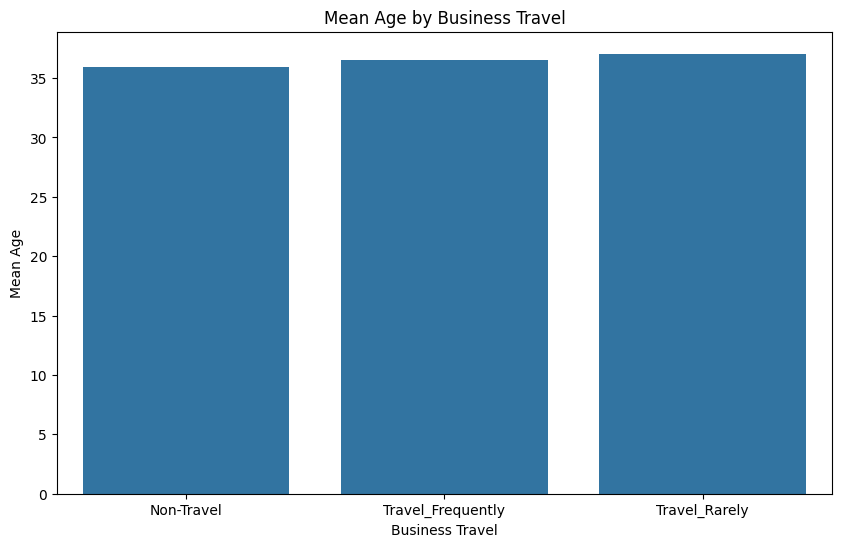

In [10]:
mean_age_by_travel = df.groupby('BusinessTravel')['Age'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='BusinessTravel', y='Age', data=mean_age_by_travel)
plt.title('Mean Age by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Mean Age')
plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

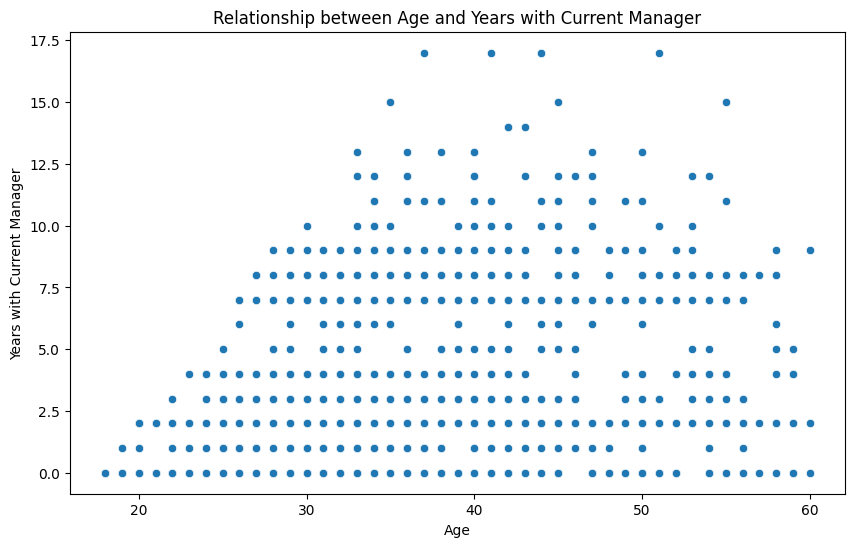

Correlation between Age and Years with Current Manager: 0.20


In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=df)
plt.title('Relationship between Age and Years with Current Manager')
plt.xlabel('Age')
plt.ylabel('Years with Current Manager')
plt.show()

# Calculate and display the correlation
correlation = df['Age'].corr(df['YearsWithCurrManager'])
print(f'Correlation between Age and Years with Current Manager: {correlation:.2f}')

Plot the average MonthlyIncome against the YearsAtCompany.

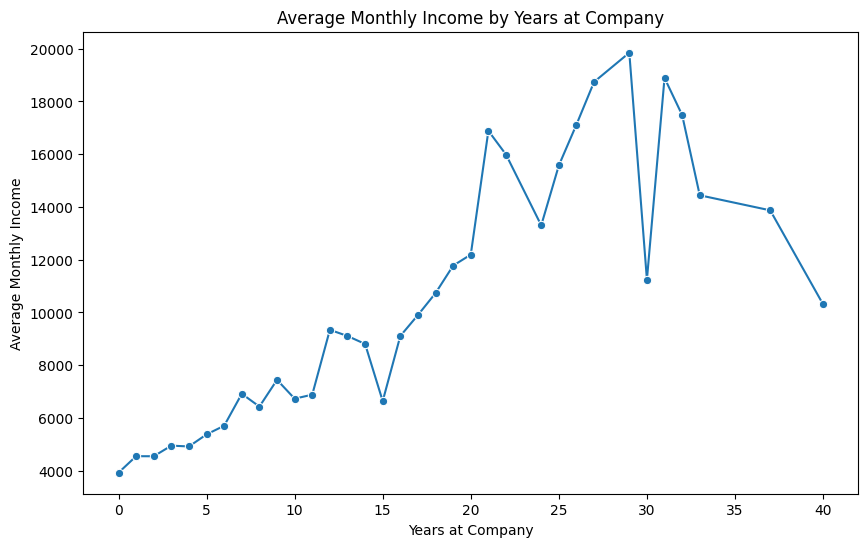

In [13]:
average_income_by_years = df.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=average_income_by_years, marker='o')
plt.title('Average Monthly Income by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Monthly Income')
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [14]:
# Label encode
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   29          0               2        592           1                 7   
1   36          0               2        884           2                 1   
2   34          0               2       1326           2                 3   
3   27          0               2        954           2                 9   
4   32          0               2        929           2                10   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          3               1            1883                        4  ...   
1          4               1            1585                        2  ...   
2          3               4            1478                        4  ...   
3          3               2            1965                        4  ...   
4          3               2             722                        4  ...   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  Yea

In [17]:
# split into train and validation
target = 'Attrition'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [18]:
# lens of train and validation datasets
print(f'Length of training set: {len(X_train)}')
print(f'Length of validation set: {len(X_val)}')
print(f'Length of test set: {len(X_test)}')

Length of training set: 660
Length of validation set: 221
Length of test set: 221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [19]:
# training data
X_train_features = X_train.copy()
y_train_labels = y_train.copy()

# Validation data
X_val_features = X_val.copy()
y_val_labels = y_val.copy()

# Test data
X_test_features = X_test.copy()
y_test_labels = y_test.copy()

print("Train features shape:", X_train_features.shape)
print("Train labels shape:", y_train_labels.shape)
print("Validation features shape:", X_val_features.shape)
print("Validation labels shape:", y_val_labels.shape)
print("Test features shape:", X_test_features.shape)
print("Test labels shape:", y_test_labels.shape)

Train features shape: (660, 35)
Train labels shape: (660,)
Validation features shape: (221, 35)
Validation labels shape: (221,)
Test features shape: (221, 35)
Test labels shape: (221,)



# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [20]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        X_test = X_test.to_numpy()
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]




# Evaluation
  

Define the model and train it.

In [24]:
knn = KNN(k=3)
knn.fit(X_train_features, y_train_labels)

Predict the y_train and y_test values.

In [25]:
y_train_pred = knn.predict(X_train_features)
y_test_pred = knn.predict(X_test_features)
y_val_pred = knn.predict(X_val_features)

train_accuracy = np.sum(y_train_pred == y_train_labels.to_numpy()) / len(y_train_labels)
test_accuracy = np.sum(y_test_pred == y_test_labels.to_numpy()) / len(y_test_labels)
val_accuracy = np.sum(y_val_pred == y_val_labels.to_numpy()) / len(y_val_labels)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy: {test_accuracy}')

Train Accuracy: 0.8727272727272727
Test Accuracy: 0.755656108597285
Validation Accuracy: 0.755656108597285


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train_features, y_train_labels)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [31]:
from sklearn.metrics import accuracy_score
y_test_pred_sklearn = knn_sklearn.predict(X_test_features)
test_accuracy_sklearn = accuracy_score(y_test_labels, y_test_pred_sklearn)

print(f'Accuracy: {test_accuracy_sklearn}')

Accuracy: 0.755656108597285


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**